In [223]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity

In [ ]:
"""
Download the Allen mouse brain atlas from cells.ucsc.edu
expr = https://cells.ucsc.edu/allen-celltypes/mouse-cortex/mouse-cortex-2019/exprMatrix.tsv.gz
meta = https://cells.ucsc.edu/allen-celltypes/mouse-cortex/mouse-cortex-2019/meta.tsv
Do some required preprocessing, this shouldn't change unless they change the portal.
"""

In [30]:
allen = sc.read_text("/home/chang/encoded/exprMatrix.tsv.gz")
meta = pd.read_csv("/home/chang/encoded/meta.tsv", sep="\t")
allen = allen.transpose()
allen.obs = meta
allen = allen[-allen.obs['subclass_label'].isna()] # There is some unlabelled cells
allen.var.index = allen.var.index.str.split("|").str[0] # Split gene names
allen = remove_sparsity(allen)
allen

AnnData object with n_obs × n_vars = 74973 × 45768
    obs: 'cellId', 'exp_component_name', 'cluster_order', 'cluster_label', 'class_order', 'class_label', 'subclass_order', 'subclass_label', 'full_genotype_label', 'donor_sex_label', 'region_label', 'cell_type_accession_label', 'cell_type_alias_label', 'cell_type_designation_label', 'neighborhood_label', 'external_donor_name_label', 'facs_population_plan_label', 'injection_materials_label', 'injection_method_label', 'injection_roi_label', 'cortical_layer_label', 'outlier_call', 'outlier_type'

In [ ]:
"""
Load in snRNA-seq data to project labels on and preprocess
Preprocessing includes filtering low quality and doublet cells
"""

In [116]:
files = "/home/chang/encoded/"
h5s = [f for f in os.listdir("/home/chang/encoded/") if f.endswith('.h5')]
sc_ad_list = []
for h5 in h5s:
    run = sc.read_10x_h5(path + h5)
    run.obs.batch = str(h5[-4])
    run.var_names_make_unique() 
    sc.pp.filter_cells(run, min_genes=500)
    sc.external.pp.scrublet(run)
    sc_ad_list.append(run)

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 65.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.5%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 26.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 31.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 33.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 16.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 43.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 63.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 6.5%


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  if layer_norm is not None:


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 62.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.1%


In [126]:
merged = sc_ad_list[0].concatenate(sc_ad_list[1:])
merged = merged[merged.obs['predicted_doublet'] == False] 
merged

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 95458 × 49570
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [165]:
merged.var['mt'] = merged.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
merged.var['EG'] = merged.var_names.str.startswith('EG-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(merged, qc_vars=['mt','EG'], percent_top=None, log1p=False, inplace=True)
merged

In [ ]:
"""
Intersect genes between the reference allen dataset and our dataset
Train a scANVI model on the reference
"""

In [172]:
intersected_genes = set(merged.var.index).intersection(set(allen.var.index))
len(intersected_genes)

31137

In [186]:
allen = allen[:,list(intersected_genes)]

In [187]:
allen = sca.models.SCANVI.setup_anndata(allen, batch_key=None, 
                                        labels_key="subclass_label", copy=True)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     Using labels from adata.obs["subclass_label"]                                       
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 74705 cells, 31137 vars, 1        
         batches, 43 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scvi/data/_anndata.py:743: UserWarning: Category 40 in adata.obs['_scvi_labels'] has fewer than 3 cells. SCVI may not train properly.
  warnings.warn(


In [188]:
vae = sca.models.SCVI(
    allen,
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)
vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 107/107: 100%|███████████████████████████████████████████| 107/107 [31:10<00:00, 17.48s/it, loss=4.81e+04, v_num=1]


In [189]:
scanvae = sca.models.SCANVI.from_scvi_model(vae, "Unknown")

In [190]:
print("Labelled Indices: ", len(scanvae._labeled_indices))
print("Unlabelled Indices: ", len(scanvae._unlabeled_indices))

Labelled Indices:  74705
Unlabelled Indices:  0


In [191]:
scanvae.train(max_epochs=20)

INFO     Training for 20 epochs.                                                             


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|████████████████████████████████████████████████| 20/20 [10:03<00:00, 30.18s/it, loss=4.8e+04, v_num=1]


In [192]:
ref_path = '/home/chang/encoded/ref_model/'
scanvae.save(ref_path, overwrite=True)

In [194]:
"""
Project labels by training our dataset on the reference trained model
"""

'\nProject labels\n'

In [195]:
merged = merged[:,list(intersected_genes)]
merged

View of AnnData object with n_obs × n_vars = 93920 × 31137
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_EG', 'pct_counts_EG'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'EG'
    uns: '_scvi'

In [207]:
merged.obs["subclass_label"] = "Unknown"
merged

AnnData object with n_obs × n_vars = 93920 × 31137
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_EG', 'pct_counts_EG', '_scvi_batch', 'subclass_label', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'EG'
    uns: '_scvi'

In [210]:
model = sca.models.SCANVI.load_query_data(
    merged,
    ref_path,
    freeze_dropout = True,
)
model._unlabeled_indices = np.arange(merged.n_obs)
model._labeled_indices = []
print("Labelled Indices: ", len(model._labeled_indices))
print("Unlabelled Indices: ", len(model._unlabeled_indices))

INFO     Using data from adata.X                                                             


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scvi/model/base/_archesmixin.py:95: UserWarning: Query integration should be performed using models trained with version >= 0.8
  warnings.warn(
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    
INFO     Successfully registered anndata object containing 93920 cells, 31137 vars, 1        
         batches, 44 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
Labelled Indices:  0
Unlabelled Indices:  93920


In [211]:
model.train(
    max_epochs=100,
    plan_kwargs=dict(weight_decay=0.0),
    check_val_every_n_epoch=10,
)
surgery_path = '/home/chang/encoded/surgery_model'
model.save(surgery_path, overwrite=True)

INFO     Training for 100 epochs.                                                            


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|███████████████████████████████████████████| 100/100 [39:35<00:00, 23.76s/it, loss=5.61e+03, v_num=1]


In [233]:
merged.obsm["X_scANVI"] = model.get_latent_representation()

In [234]:
merged.obs['cell_type'] = model.predict()

In [235]:
sc.pp.neighbors(merged, use_rep='X_scANVI')
sc.tl.leiden(merged)
sc.tl.umap(merged)
sc.pp.normalize_total(merged, target_sum=1e4)

<Figure size 800x800 with 0 Axes>

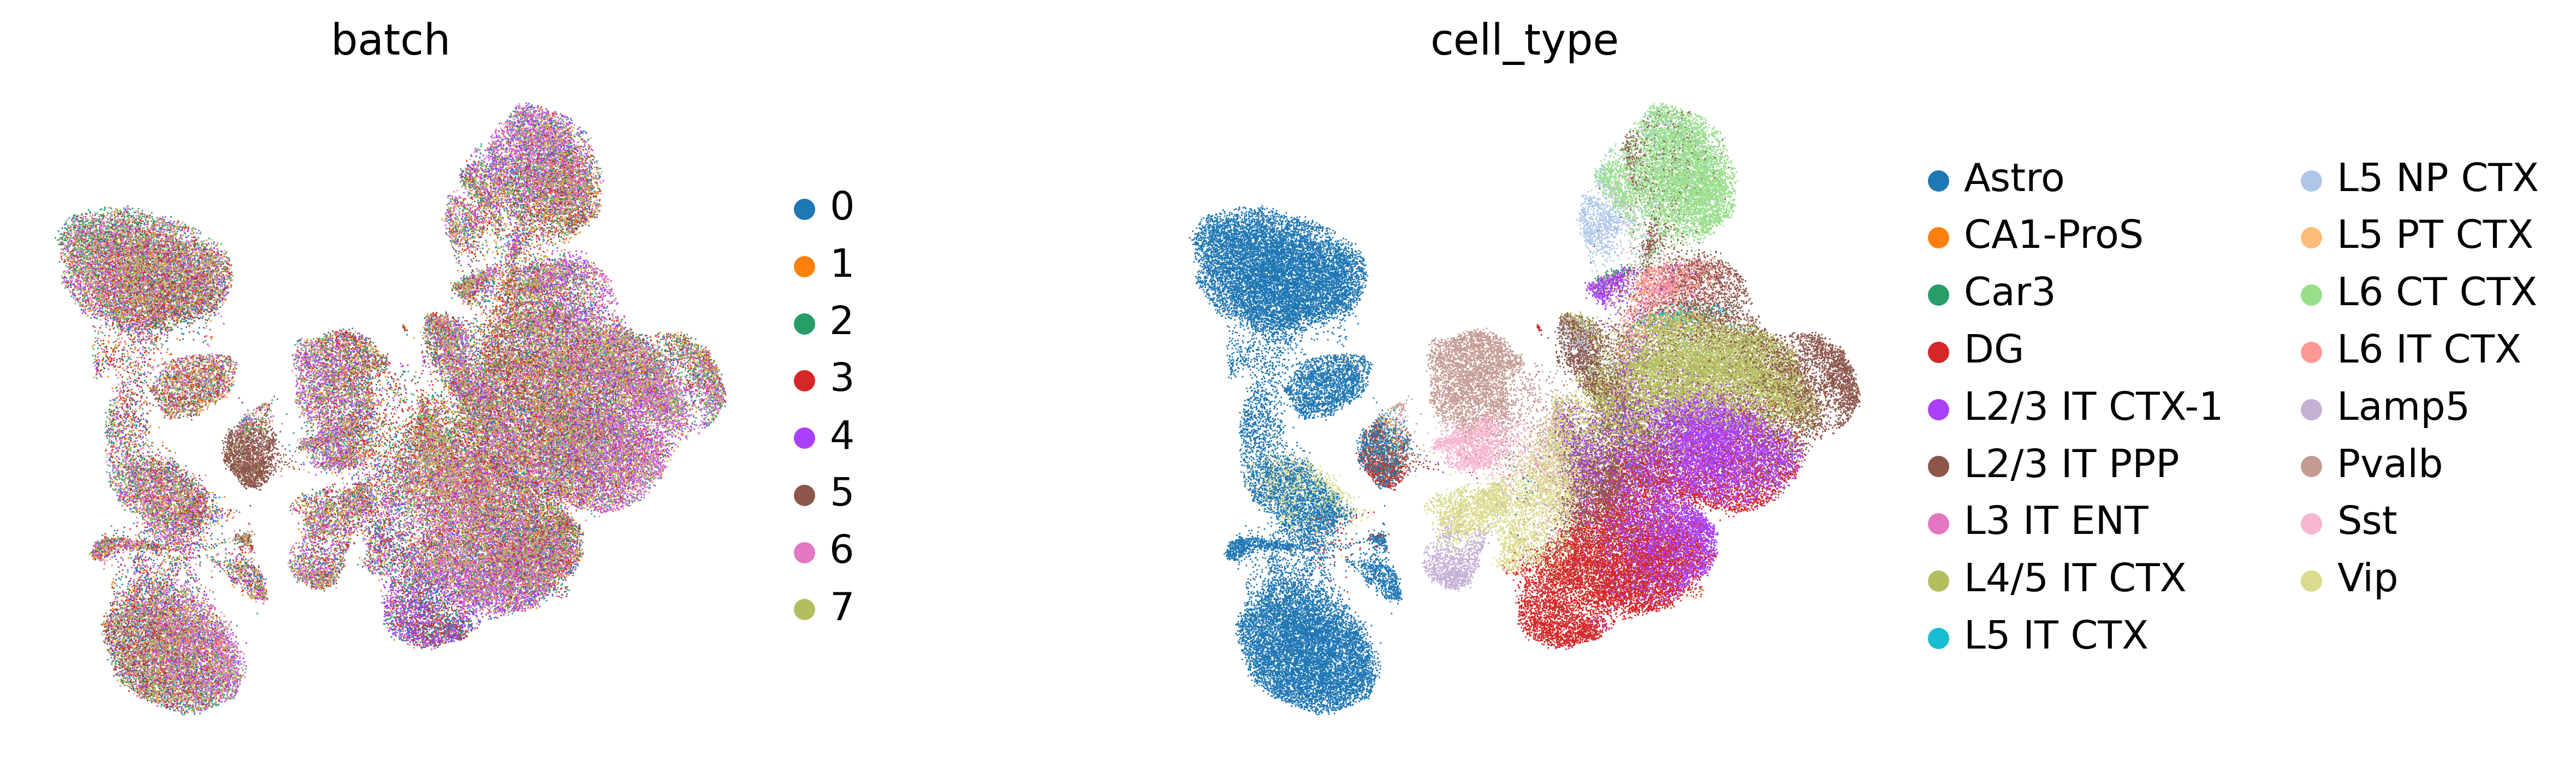

In [236]:
plt.figure()
sc.pl.umap(
    merged,
    color=["batch", "cell_type"],
    frameon=False,
    wspace=0.4,
)

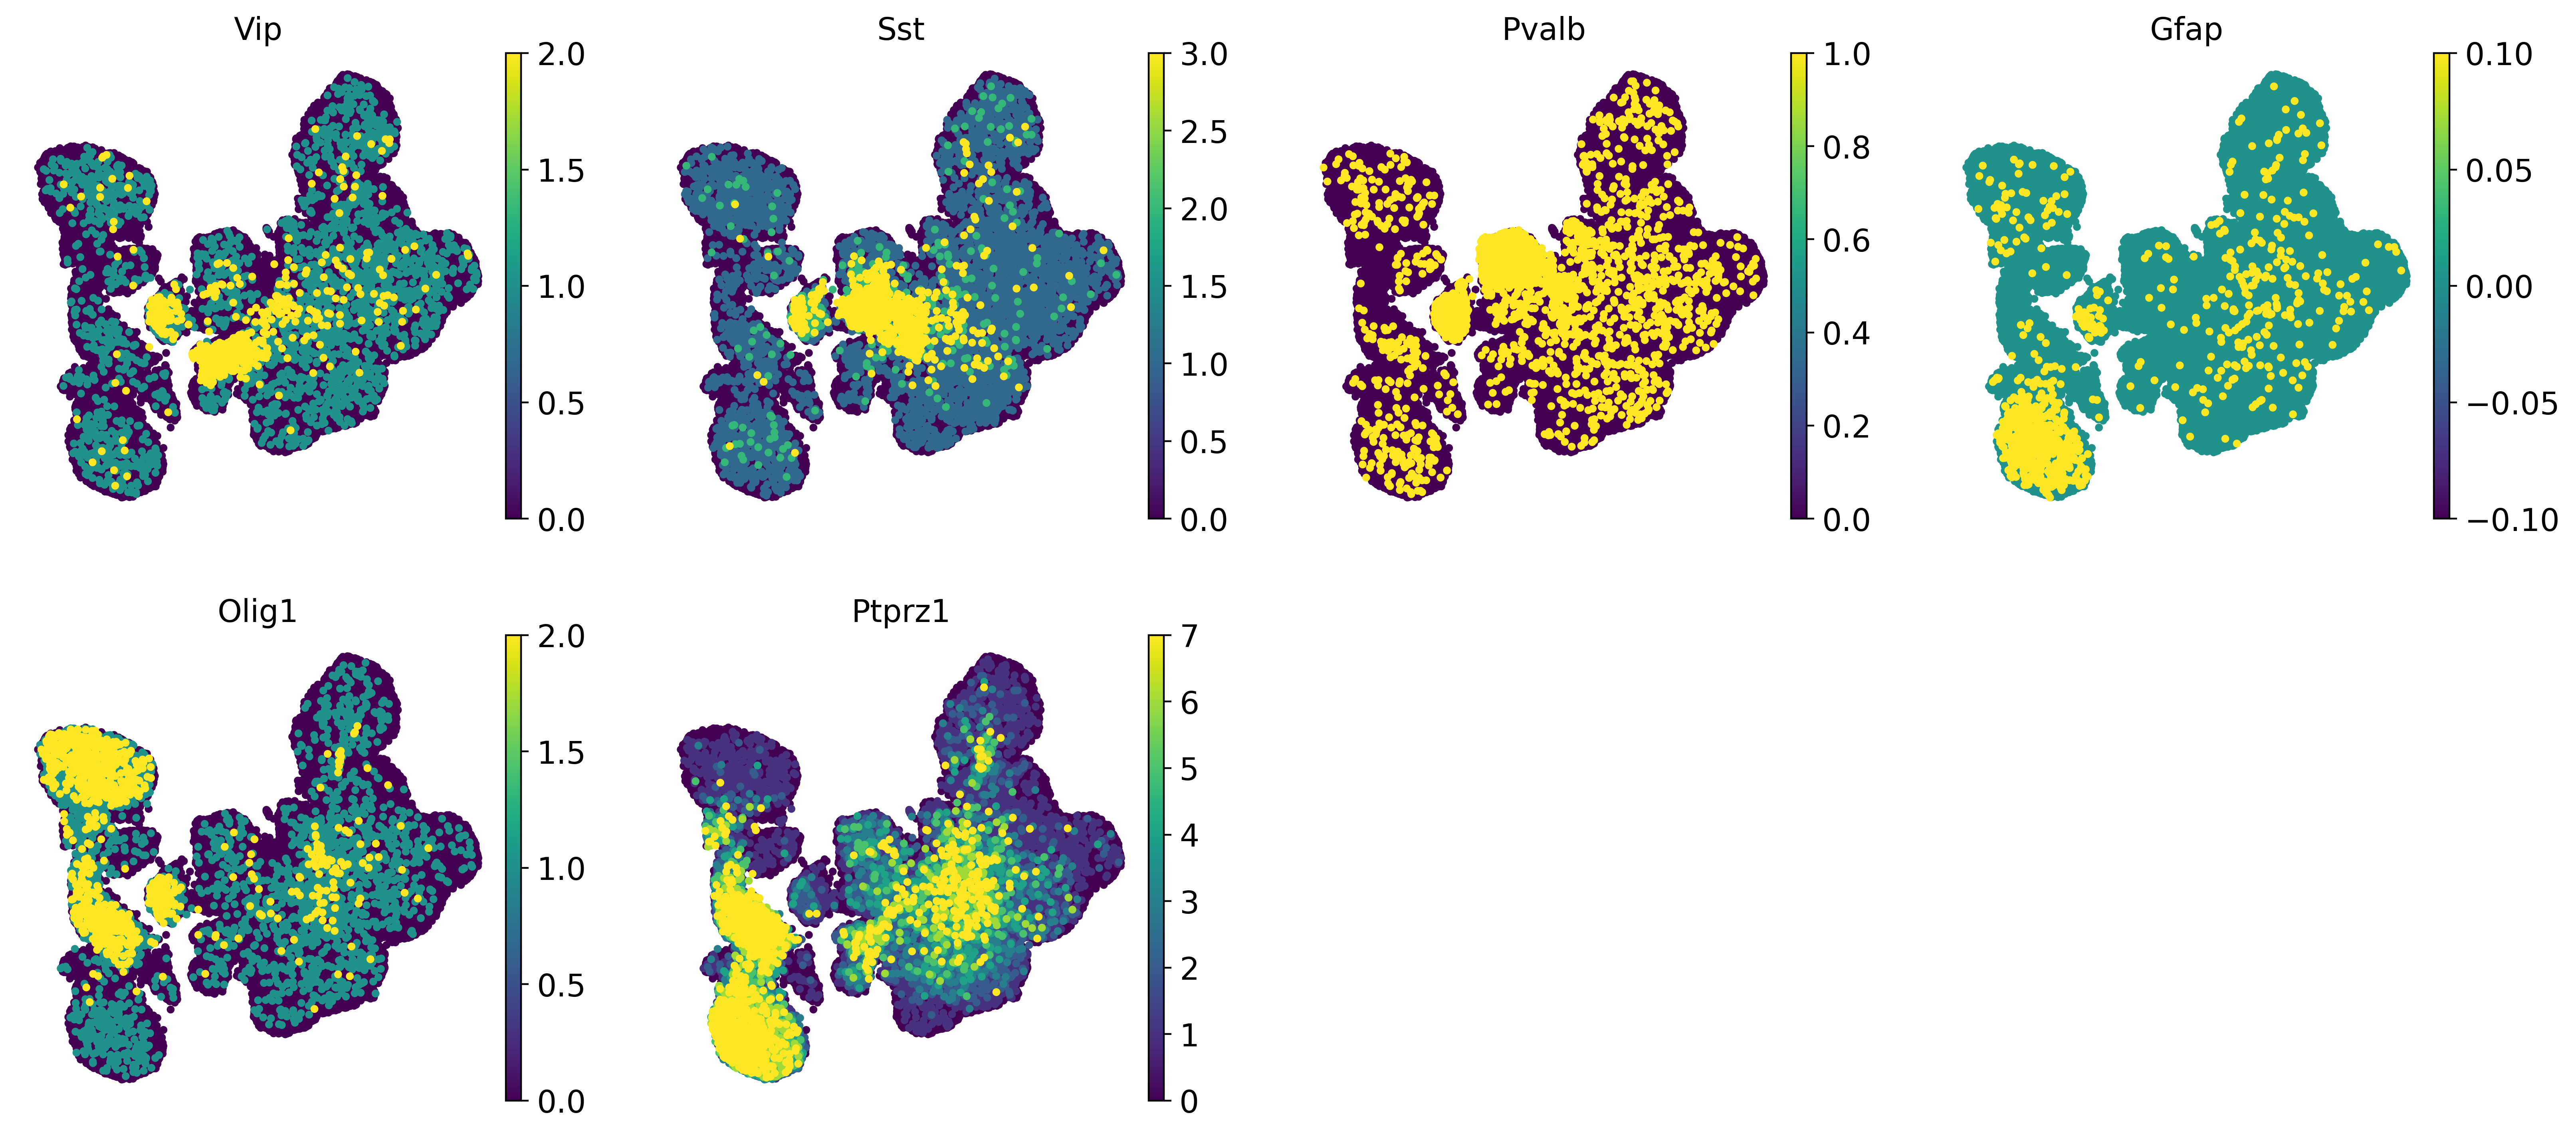

In [237]:
sc.pl.umap(merged, 
           color=['Vip', 'Sst', 'Pvalb', 'Gfap', 'Olig1', 'Ptprz1'], 
           s=50, frameon=False, ncols=4, vmax='p99')